In [1]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
from scipy.optimize import curve_fit
import matplotlib
#%matplotlib inline
%matplotlib widget

In [2]:
def func(x, A1, s1, m1, A2, s2, m2 ,c):
    return A1 * np.exp(-s1 * (x-m1)**2) + A2 * np.exp(-s2 * (x-m2)**2) + c
def g1(x, A1, s1, m1, c):
    return A1 * np.exp(-s1 * (x-m1)**2)+c

In [3]:
cd scratch3

/scratch3/users/anneke


In [4]:
ls

HST/


In [5]:
cd HST

/scratch3/users/anneke/HST


In [6]:
hdu = fits.open('goodsn-42-G141_01060.2D.fits') ## Load fits
sci_d = hdu['SCI'].data
sci_h = hdu['SCI'].header
wl = np.linspace(1*sci_h['CRVAL1'],1*sci_h['CRVAL1'] + ((sci_h['NAXIS1']-1)*sci_h["CD1_1"]),sci_h['NAXIS1'])

In [7]:
wl_d=np.linspace(1*sci_h['CRVAL1'],1*sci_h['CRVAL1'] + ((sci_h['NAXIS1']-1)*sci_h["CD1_1"]),sci_h['NAXIS1']*10)

In [31]:

wl_d1=wl_d[1110:1410]
wl_d1

array([12668.40923754, 12670.66240329, 12672.91556905, 12675.1687348 ,
       12677.42190056, 12679.67506631, 12681.92823207, 12684.18139783,
       12686.43456358, 12688.68772934, 12690.94089509, 12693.19406085,
       12695.44722661, 12697.70039236, 12699.95355812, 12702.20672387,
       12704.45988963, 12706.71305539, 12708.96622114, 12711.2193869 ,
       12713.47255265, 12715.72571841, 12717.97888416, 12720.23204992,
       12722.48521568, 12724.73838143, 12726.99154719, 12729.24471294,
       12731.4978787 , 12733.75104446, 12736.00421021, 12738.25737597,
       12740.51054172, 12742.76370748, 12745.01687324, 12747.27003899,
       12749.52320475, 12751.7763705 , 12754.02953626, 12756.28270201,
       12758.53586777, 12760.78903353, 12763.04219928, 12765.29536504,
       12767.54853079, 12769.80169655, 12772.05486231, 12774.30802806,
       12776.56119382, 12778.81435957, 12781.06752533, 12783.32069108,
       12785.57385684, 12787.8270226 , 12790.08018835, 12792.33335411,
      

In [9]:
hdu['SCI'].header

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  312                                                  
NAXIS2  =                   41                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
EXTNAME = 'SCI     '                                                            
CRPIX1  =                    1                                                  
CD1_1   =    22.59686171240901                                                  
CD1_2   =                    0                                                  
CRVAL1  =    10167.39524851952                                                  
CUNIT1  = 'Angstrom'        

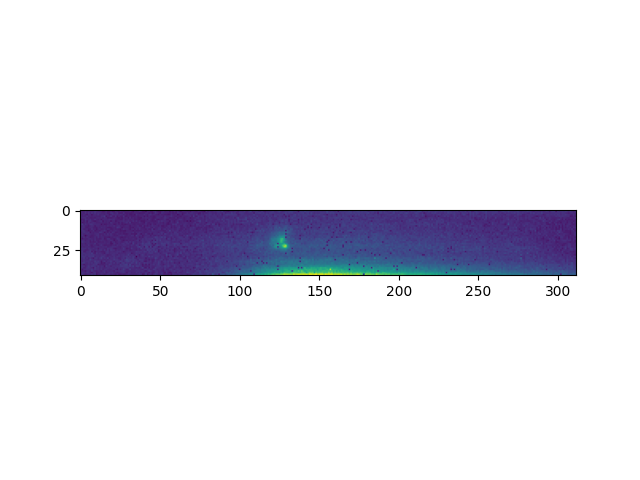

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(hdu['SCI'].data)
plt.show()

In [11]:
data = hdu['SCI'].data[22,110:140]   ## Extract fits file data (values got by eyeballing the imshow)
print(data)
hdu['SCI'].header
# Observed peaks of OIII line
ns = np.nanmean(hdu['SCI'].data[23:25,110:140],axis=0)
ss = np.nanmean(hdu['SCI'].data[19:21,110:140],axis=0)
wl_s = wl[110:140]

[0.07025735 0.10124537 0.08127703 0.08352374 0.0865227  0.08374514
 0.07721471 0.07999526 0.083603   0.09660716 0.127021   0.10731463
 0.15107947 0.1955422  0.20785707 0.17753332 0.20437395 0.25618986
 0.29427448 0.32659609 0.19281928 0.12941686 0.09991945 0.09852149
 0.0953414  0.07620114 0.07649414 0.08685088 0.07438385 0.0758074 ]


In [12]:
wl_s


array([12653.05003688, 12675.6468986 , 12698.24376031, 12720.84062202,
       12743.43748373, 12766.03434545, 12788.63120716, 12811.22806887,
       12833.82493058, 12856.4217923 , 12879.01865401, 12901.61551572,
       12924.21237743, 12946.80923915, 12969.40610086, 12992.00296257,
       13014.59982428, 13037.196686  , 13059.79354771, 13082.39040942,
       13104.98727113, 13127.58413285, 13150.18099456, 13172.77785627,
       13195.37471798, 13217.97157969, 13240.56844141, 13263.16530312,
       13285.76216483, 13308.35902654])

In [13]:
err= hdu['SCI'].data[22, 50:100]
err2=hdu['SCI'].data[22,150:200]
err1=np.mean([err,err2])
err





array([ 0.02405547,  0.03339166,  0.04390108,  0.03589052, -0.00237712,
        0.03259501,  0.03260374,  0.03014522,  0.02585674,  0.04454377,
        0.02523941,  0.04007476,  0.03174638,  0.03554184,  0.0336908 ,
        0.04753808,  0.03284426,  0.04364164,  0.03232717,  0.02369732,
        0.03297465,  0.03918477,  0.04242015,  0.04533754,  0.04327199,
        0.02719065,  0.03752185,  0.04904049,  0.03285335,  0.04555075,
        0.03944674,  0.03511494,  0.04129202,  0.0226576 ,  0.05148227,
        0.0514104 ,  0.06777213,  0.04663185,  0.03630599,  0.06491716,
        0.06272471,  0.05044853,  0.04916991,  0.06319529,  0.05691474,
        0.04487807,  0.05665927,  0.06600779,  0.05388706,  0.04361129])

x= np.linspace(1*sci_h['CRVAL1'],1*sci_h['CRVAL1'] + ((sci_h['NAXIS1']-1)*sci_h["CD1_1"]),sci_h['NAXIS1'])
x_d = np.linspace(1*sci_h['CRVAL1'],1*sci_h['CRVAL1'] + ((sci_h['NAXIS1']-1)*sci_h["CD1_1"]),sci_h['NAXIS1']*10)

In [14]:
x1 = np.linspace(10167,10167.39524851952+(311* 22.59686171240901),len(data))      ### Pixel x values (could convert to frequency using header!)
x_d1 = np.linspace(10167,10167.39524851952+(311* 22.59686171240901),len(data)*10) ### Detailed x values for fitting (10 x more detailed)

x=x1[110:140]
x_d=x_d1[110:140]
x

array([], dtype=float64)

x = np.linspace(0,150,50)      ### Pixel x values (could convert to frequency using header!) 
x_d = np.linspace(0,150,150*10) ### Detailed x values for fitting (10 x more detailed)

In [15]:
x1

array([10167.        , 10409.34549107, 10651.69098214, 10894.03647322,
       11136.38196429, 11378.72745536, 11621.07294643, 11863.4184375 ,
       12105.76392857, 12348.10941965, 12590.45491072, 12832.80040179,
       13075.14589286, 13317.49138393, 13559.836875  , 13802.18236608,
       14044.52785715, 14286.87334822, 14529.21883929, 14771.56433036,
       15013.90982143, 15256.25531251, 15498.60080358, 15740.94629465,
       15983.29178572, 16225.63727679, 16467.98276786, 16710.32825894,
       16952.67375001, 17195.01924108])

In [16]:
x_d1

array([10167.        , 10190.50508107, 10214.01016215, 10237.51524322,
       10261.0203243 , 10284.52540537, 10308.03048644, 10331.53556752,
       10355.04064859, 10378.54572966, 10402.05081074, 10425.55589181,
       10449.06097289, 10472.56605396, 10496.07113503, 10519.57621611,
       10543.08129718, 10566.58637826, 10590.09145933, 10613.5965404 ,
       10637.10162148, 10660.60670255, 10684.11178362, 10707.6168647 ,
       10731.12194577, 10754.62702685, 10778.13210792, 10801.63718899,
       10825.14227007, 10848.64735114, 10872.15243222, 10895.65751329,
       10919.16259436, 10942.66767544, 10966.17275651, 10989.67783758,
       11013.18291866, 11036.68799973, 11060.19308081, 11083.69816188,
       11107.20324295, 11130.70832403, 11154.2134051 , 11177.71848618,
       11201.22356725, 11224.72864832, 11248.2337294 , 11271.73881047,
       11295.24389154, 11318.74897262, 11342.25405369, 11365.75913477,
       11389.26421584, 11412.76929691, 11436.27437799, 11459.77945906,
      

In [17]:
wl_s

array([12653.05003688, 12675.6468986 , 12698.24376031, 12720.84062202,
       12743.43748373, 12766.03434545, 12788.63120716, 12811.22806887,
       12833.82493058, 12856.4217923 , 12879.01865401, 12901.61551572,
       12924.21237743, 12946.80923915, 12969.40610086, 12992.00296257,
       13014.59982428, 13037.196686  , 13059.79354771, 13082.39040942,
       13104.98727113, 13127.58413285, 13150.18099456, 13172.77785627,
       13195.37471798, 13217.97157969, 13240.56844141, 13263.16530312,
       13285.76216483, 13308.35902654])

In [18]:
x
x_d
x1.shape

(30,)

In [19]:
x1

array([10167.        , 10409.34549107, 10651.69098214, 10894.03647322,
       11136.38196429, 11378.72745536, 11621.07294643, 11863.4184375 ,
       12105.76392857, 12348.10941965, 12590.45491072, 12832.80040179,
       13075.14589286, 13317.49138393, 13559.836875  , 13802.18236608,
       14044.52785715, 14286.87334822, 14529.21883929, 14771.56433036,
       15013.90982143, 15256.25531251, 15498.60080358, 15740.94629465,
       15983.29178572, 16225.63727679, 16467.98276786, 16710.32825894,
       16952.67375001, 17195.01924108])

In [20]:
x

array([], dtype=float64)

In [21]:
errs=np.zeros(x.shape)
print(errs)


[]


In [34]:
#           A1,  s1, m1,  A2,  s2, m2,   c
lower_b = [0.1, 0.05, 10*22.59686171240901+10167.39524851952, 0.1, 0.05, 10*22.59686171240901+10167.39524851952,0.01]
upper_b = [0.4, 0.5, 20*22.59686171240901+10167.39524851952, 0.35, 0.5, 20*22.59686171240901+10167.39524851952, 1.01]

popt, pcov = curve_fit(func,wl_s,ns, bounds=(lower_b, upper_b))


In [23]:
popt

array([2.50000000e-01, 2.75000000e-01, 1.24270814e+04, 2.25000000e-01,
       2.75000000e-01, 1.18621599e+04, 1.07989336e-01])

In [24]:
## These are the rest frame line values for OIII
O3_A = 5006.843 ## in angstroms!
O3_B= 4958.911 ## in angstroms!
z = 1.6095

## Convert to observer frame
O3_A_obs = O3_A*(1+z)
O3_B_obs = O3_B*(1+z)

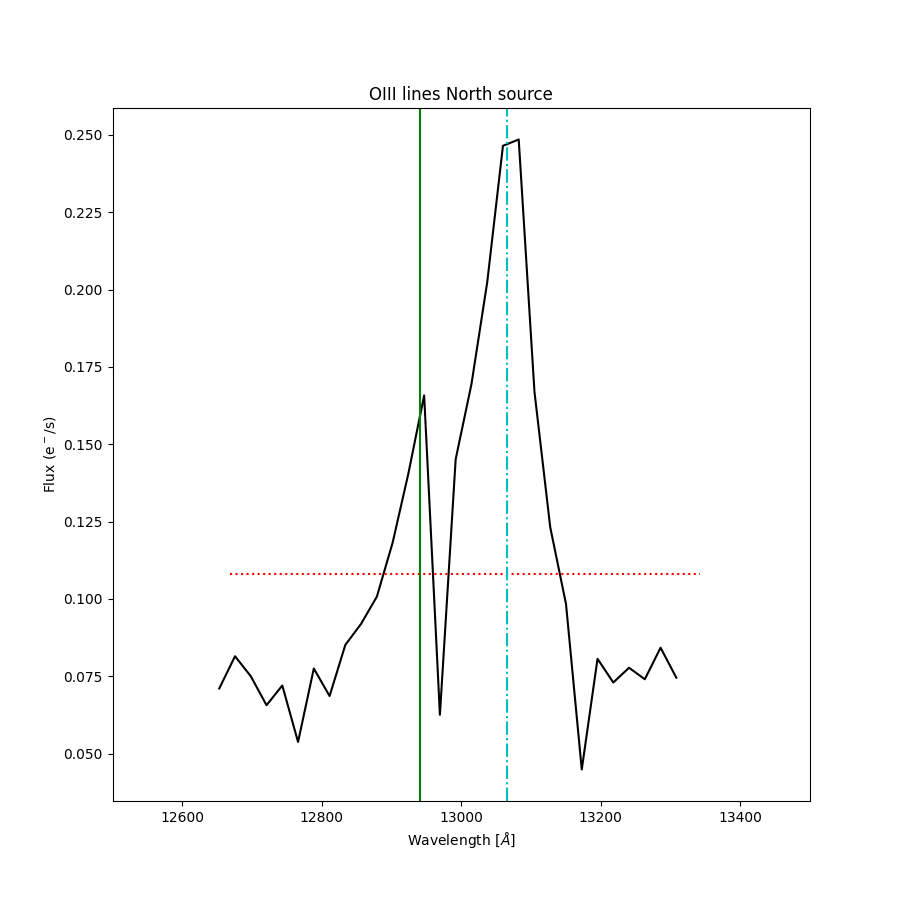

[2.50000000e-01 2.75000000e-01 1.05063482e+04 2.25000000e-01
 2.75000000e-01 1.05063482e+04 1.07989336e-01]
[[0.        0.        0.        0.        0.        0.        0.       ]
 [0.        0.        0.        0.        0.        0.        0.       ]
 [0.        0.        0.        0.        0.        0.        0.       ]
 [0.        0.        0.        0.        0.        0.        0.       ]
 [0.        0.        0.        0.        0.        0.        0.       ]
 [0.        0.        0.        0.        0.        0.        0.       ]
 [0.        0.        0.        0.        0.        0.        0.0001239]]
The Amplitude of the first peak is: 0.25
The Wavelength peak of the first peak is:
The Amplitude of the second peak is:


In [35]:
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111)
ax.plot(wl_s, ns,'k-')
ax.plot(wl_d1, func(wl_d1, *popt),'r:')


ax.set_ylabel('Flux (e$^-$/s)')
ax.set_xlabel('Wavelength [$\AA$]')
ax.set_title('OIII lines North source')
ax.axvline(O3_A_obs,ls='-.',c='c',label="O[III] 5006$\AA$")
ax.axvline(O3_B_obs,ls='-',c='g',label="O[III] 4958$\AA$")
plt.xlim(12500, 13500)
#ax = fig.add_subplot(122) 
#ax.errorbar(x, data,yerr=errs,ls='-')
#ax.plot(x_d, (popt[0]* np.exp(-popt[1] * (x_d-popt[2])**2)) + popt[-1],'g--')
#ax.plot(x_d, (popt[3]* np.exp(-popt[4] * (x_d-popt[5])**2)) + popt[-1],'c-.')
#ax.set_xlabel('Pixels')

plt.show()
#plt.savefig('OIII Gaussian.png')
#info obtained:
print(popt)
print(pcov)
print('The Amplitude of the first peak is:', popt[0])
print('The Wavelength peak of the first peak is:')
print('The Amplitude of the second peak is:')


In [26]:
pcovd=np.diag(pcov)
print(np.sqrt(pcovd))

[0.         0.         0.         0.         0.         0.
 0.01113089]


ValueError: operands could not be broadcast together with shapes (0,) (30,) 

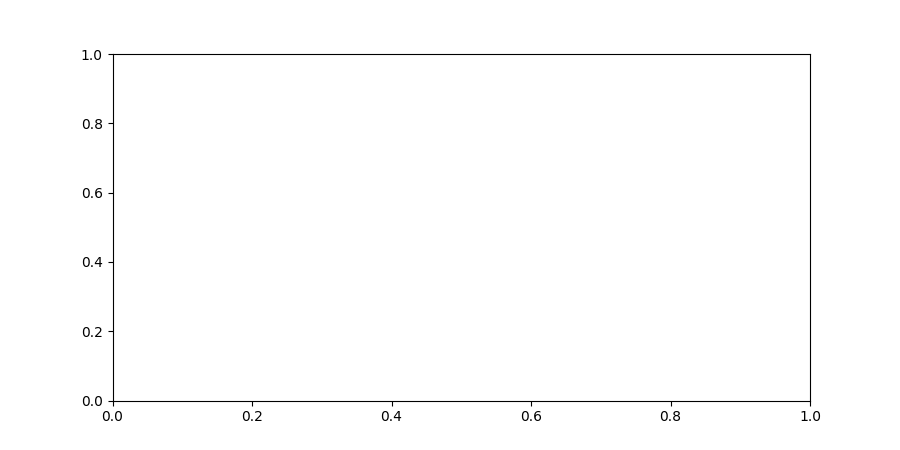

In [27]:
### Plot residuals 
fig = plt.figure(figsize=(9,4.5))
ax = fig.add_subplot(111)
ax.plot(x,np.abs(func(x, *popt)-data),'ko')
ax.set_ylim(0,0.1)
ax.set_ylabel('Residuals ($|$fit-data$|$)')
ax.set_xlabel('Pixels')
plt.show()

In [ ]:
#wut
np.linalg.cond(pcov) ## Some redundancy in the fit

In [ ]:
#errors on the outputs:  A1,  s1, m1,  A2,  s2, m2,   c
np.diag(pcov) # largest is m2?

#### Fit second gaussian

In [ ]:
data2 = hdu['SCI'].data[19,110:140]        ## Extract fits file data (values got by eyeballing the imshow)

In [ ]:
x2 = np.linspace(10167,(len(data2)-1)*22.59686171240901+10167.39524851952,len(data2))      ### Pixel x values (could convert to frequency using header!)
x_d2 = np.linspace(10167,(len(data2)-1)*22.59686171240901+10167.39524851952,len(data2)*10)

In [ ]:
#     A1,  s1, m1,   c
lb = [0.185, 0.0, 15*22.59686171240901+10167.39524851952, 0.0]
ub = [0.3, 0.005, 20*22.59686171240901+10167.39524851952, 0.7]
popt, pcov = curve_fit(g1,x2,data2,bounds=(lb, ub))
popt

In [ ]:
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111)
ax.plot(x2, data2,'k-')
ax.plot(x_d2, g1(x_d2, *popt),'r:')
#ax = fig.add_subplot(122)
#ax.plot(x, data,'k-')
#ax.plot(x_d, (popt[0]* np.exp(-popt[1] * (x_d-popt[2])**2)) + popt[-1],'g--')
plt.xlim(0*22.59686171240901+10167.39524851952, 30*22.59686171240901+10167.39524851952)
plt.title("OIII South source")
plt.ylabel("Flux (e-/s)")
ax.set_xlabel('Wavelength [$\AA$]')
plt.show()
plt.savefig('OIII Gaussian_SouthSource.png')
popt

In [ ]:
#convert pixels to Wavelength, 
#calulate v offset, 

In [ ]:
curve_fit?


In [ ]:
popt?


In [ ]:
extent?

In [ ]:
extend?

In [ ]:
extent()